In [115]:
from games.kuhn.kuhn import KuhnPoker
from agents.counterfactual_regret import CounterFactualRegret
from agents.conterfactual_regretplus import CounterFactualRegretPlus
from agents.counterfactual_regret_sampling import CounterFactualRegretSampling
from collections import OrderedDict

In [116]:
g = KuhnPoker()

In [117]:
# import numpy as np
# from collections import OrderedDict

# num_runs = 10
# training_iterations = 2000
# all_policies = []

# print(f"Ejecutando {num_runs} sesiones de entrenamiento de {training_iterations} iteraciones cada una...")

# for i in range(num_runs):
#     print(f"\n--- Iniciando Ejecución {i+1}/{num_runs} ---")
#     # Reinicializar el juego y los agentes para una ejecución limpia
#     g = KuhnPoker(seed=42)  # Semilla fija para el juego para reproducibilidad
#     agent_classes = [CounterFactualRegret, CounterFactualRegret]
#     my_agents = {}
#     g.reset()
#     for agent_id, agent_name in enumerate(g.agents):
#         my_agents[agent_name] = agent_classes[agent_id](
#             game=g, 
#             agent=agent_name, 
#             seed=24  # Usar una semilla diferente para el agente en cada ejecución
#         )

#     # Entrenar agentes
#     for agent_name in g.agents:
#         my_agents[agent_name].train(training_iterations)

#     # Almacenar las políticas de esta ejecución
#     run_policies = {}
#     for agent_name in g.agents:
#         # Extraer la política final del diccionario de nodos del agente
#         policy = OrderedDict(
#             (n, my_agents[agent_name].node_dict[n].policy()) 
#             for n in sorted(my_agents[agent_name].node_dict.keys())
#         )
#         print(policy)
#         run_policies[agent_name] = policy
#     all_policies.append(run_policies)
#     print(f"Ejecución {i+1} completada. Políticas almacenadas.")

# # Paso de verificación
# print("\n--- Verificando Consistencia de Políticas ---")

# if not all_policies or len(all_policies) < 2:
#     print("Se necesita al menos 2 ejecuciones para comparar.")
# else:
#     base_policy_run = all_policies[0]
#     are_all_consistent = True
    
#     # Comparar cada ejecución con la primera
#     for i in range(1, len(all_policies)):
#         current_policy_run = all_policies[i]
#         for agent_name in base_policy_run:
#             base_policy = base_policy_run[agent_name]
#             current_policy = current_policy_run[agent_name]

#             if base_policy.keys() != current_policy.keys():
#                 print(f"Discrepancia en los conjuntos de información para el agente {agent_name} entre la ejecución 1 y la {i+1}")
#                 are_all_consistent = False
#                 break

#             for info_set, base_actions in base_policy.items():
#                 current_actions = current_policy[info_set]
#                 # Usar una tolerancia para la comparación de punto flotante
#                 if not np.allclose(base_actions, current_actions, atol=1e-2):
#                     print(f"Divergencia de política encontrada para el agente {agent_name} en el info_set '{info_set}' entre la ejecución 1 y la {i+1}:")
#                     print(f"  Ejecución 1:     {np.round(base_actions, 3)}")
#                     print(f"  Ejecución {i+1}: {np.round(current_actions, 3)}")
#                     are_all_consistent = False
            
#             if not are_all_consistent:
#                 break
#         if not are_all_consistent:
#             break

#     if are_all_consistent:
#         print("\n¡Éxito! Todas las políticas a lo largo de todas las ejecuciones son consistentes.")
#         print("Política final para el Agente 0 (de la última ejecución):")
#         # Imprimir la política de la última ejecución como referencia
#         last_policy_agent0 = all_policies[-1][g.agents[0]]
#         for info_set, policy in last_policy_agent0.items():
#             print(f"  InfoSet '{info_set}': P(Pass)={policy[0]:.3f}, P(Bet)={policy[1]:.3f}")
#     else:
#         print("\nLas políticas no son consistentes en todas las ejecuciones.")

In [118]:
# In your notebook, update the agent creation:
agent_classes = [CounterFactualRegret, CounterFactualRegret]
my_agents = {}
g.reset()
for i, agent in enumerate(g.agents):
    my_agents[agent] = agent_classes[i](
        game=g, 
        agent=agent, 
        track_frequency=1,
        seed=42,
    )

In [119]:
for agent in g.agents:
    print('Training agent ' + agent)
    my_agents[agent].train(100000)
    print('Agent ' + agent + ' policies:')
    print(OrderedDict(map(lambda n: (n, my_agents[agent].node_dict[n].policy()), sorted(my_agents[agent].node_dict.keys()))))
    print('')

Training agent agent_0
Agent agent_0 policies:
OrderedDict([('0', array([0.85213452, 0.14786548])), ('0b', array([9.99985038e-01, 1.49615488e-05])), ('0p', array([0.66730094, 0.33269906])), ('0pb', array([9.99991187e-01, 8.81341356e-06])), ('1', array([9.99837979e-01, 1.62021063e-04])), ('1b', array([0.66078523, 0.33921477])), ('1p', array([9.99940087e-01, 5.99125277e-05])), ('1pb', array([0.5080414, 0.4919586])), ('2', array([0.56793165, 0.43206835])), ('2b', array([1.50606946e-05, 9.99984939e-01])), ('2p', array([1.50606946e-05, 9.99984939e-01])), ('2pb', array([1.31861671e-05, 9.99986814e-01]))])

Training agent agent_1
Agent agent_1 policies:
OrderedDict([('0', array([0.77434948, 0.22565052])), ('0b', array([9.99984995e-01, 1.50046514e-05])), ('0p', array([0.6693805, 0.3306195])), ('0pb', array([9.99990303e-01, 9.69728287e-06])), ('1', array([9.99640422e-01, 3.59577868e-04])), ('1b', array([0.66249591, 0.33750409])), ('1p', array([9.99795096e-01, 2.04903757e-04])), ('1pb', array([0

In [121]:
cum_rewards = dict(map(lambda agent: (agent, 0.), g.agents))
niter = 20000
for _ in range(niter):
    g.reset()
    turn = 0
    while not g.done():
        # print('Turn: ', turn)
        # print('\tPlayer: ', g.agent_selection)
        # print('\tObservation: ', g.observe(g.agent_selection))
        a = my_agents[g.agent_selection].action()
        # print('\tAction: ', g._moves[a])
        g.step(action=a)
        turn += 1
    #print('Rewards: ', g.rewards)
    for agent in g.agents:
        cum_rewards[agent] += g.rewards[agent]
print('Average rewards:', dict(map(lambda agent: (agent, cum_rewards[agent]/niter), g.agents)))


Average rewards: {'agent_0': -0.0514, 'agent_1': 0.0514}


In [122]:
print('Check learned policies against theoretical policies:')

Check learned policies against theoretical policies:


In [123]:
JX_b = my_agents[g.agents[0]].node_dict['0'].policy()[1]
print(f'Agent: 0 - Hand: J_ - History: [] - Probability of betting: {JX_b}')


Agent: 0 - Hand: J_ - History: [] - Probability of betting: 0.14786548453445936


In [124]:
QX_pb_b = my_agents[g.agents[0]].node_dict['1pb'].policy()[1]
print(f'Agent: 0 - Hand: Q_ - History: pb - Probability of betting: {QX_pb_b} - Theoretic value: {JX_b+1/3} -  Difference: {abs(QX_pb_b - (JX_b+1/3))}')


Agent: 0 - Hand: Q_ - History: pb - Probability of betting: 0.4919586035373382 - Theoretic value: 0.48119881786779267 -  Difference: 0.010759785669545552


In [125]:
KX_b = my_agents[g.agents[0]].node_dict['2'].policy()[1]
print(f'Agent: 0 - Hand: K_ - History: [] - Probability of betting: {KX_b} - Theoretic value: {3 * JX_b} -  Difference: {abs(KX_b - 3 * JX_b)}')


Agent: 0 - Hand: K_ - History: [] - Probability of betting: 0.4320683502518697 - Theoretic value: 0.44359645360337807 -  Difference: 0.01152810335150839


In [126]:
XJ_p_b = my_agents[g.agents[0]].node_dict['0p'].policy()[1]
print(f'Agent: 0 - Hand: _J - History: p - Probability of betting: {XJ_p_b} - Theoretic value: {1/3} -  Difference: {abs(XJ_p_b - 1/3)}')

Agent: 0 - Hand: _J - History: p - Probability of betting: 0.3326990599426811 - Theoretic value: 0.3333333333333333 -  Difference: 0.0006342733906521958


In [127]:
XQ_b_b = my_agents[g.agents[0]].node_dict['1b'].policy()[1]
print(f'Agent: 0 - Hand: _Q - History: b - Probability of betting: {XQ_b_b} - Theoretic value: {1/3} -  Difference: {abs(XQ_b_b - 1/3)}')

Agent: 0 - Hand: _Q - History: b - Probability of betting: 0.33921477013912943 - Theoretic value: 0.3333333333333333 -  Difference: 0.005881436805796114


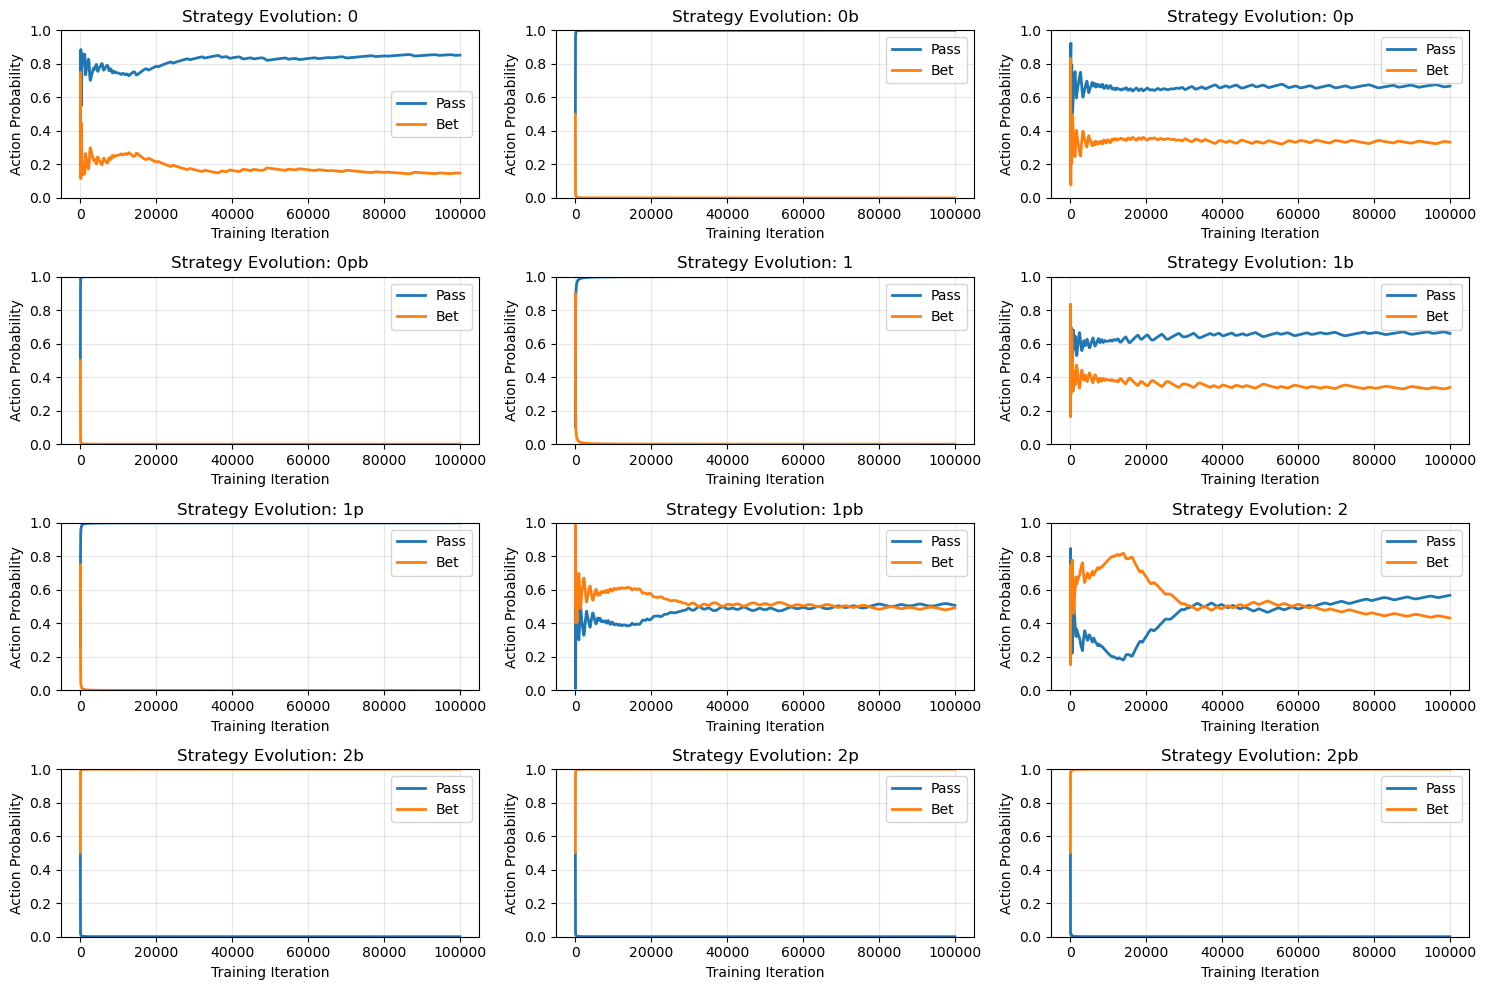

In [134]:
# Plot strategy evolution for all information sets
my_agents[g.agents[0]].plot_strategy_evolution(
    action_names={0: 'Pass', 1: 'Bet'},
    figsize=(15, 10)
)

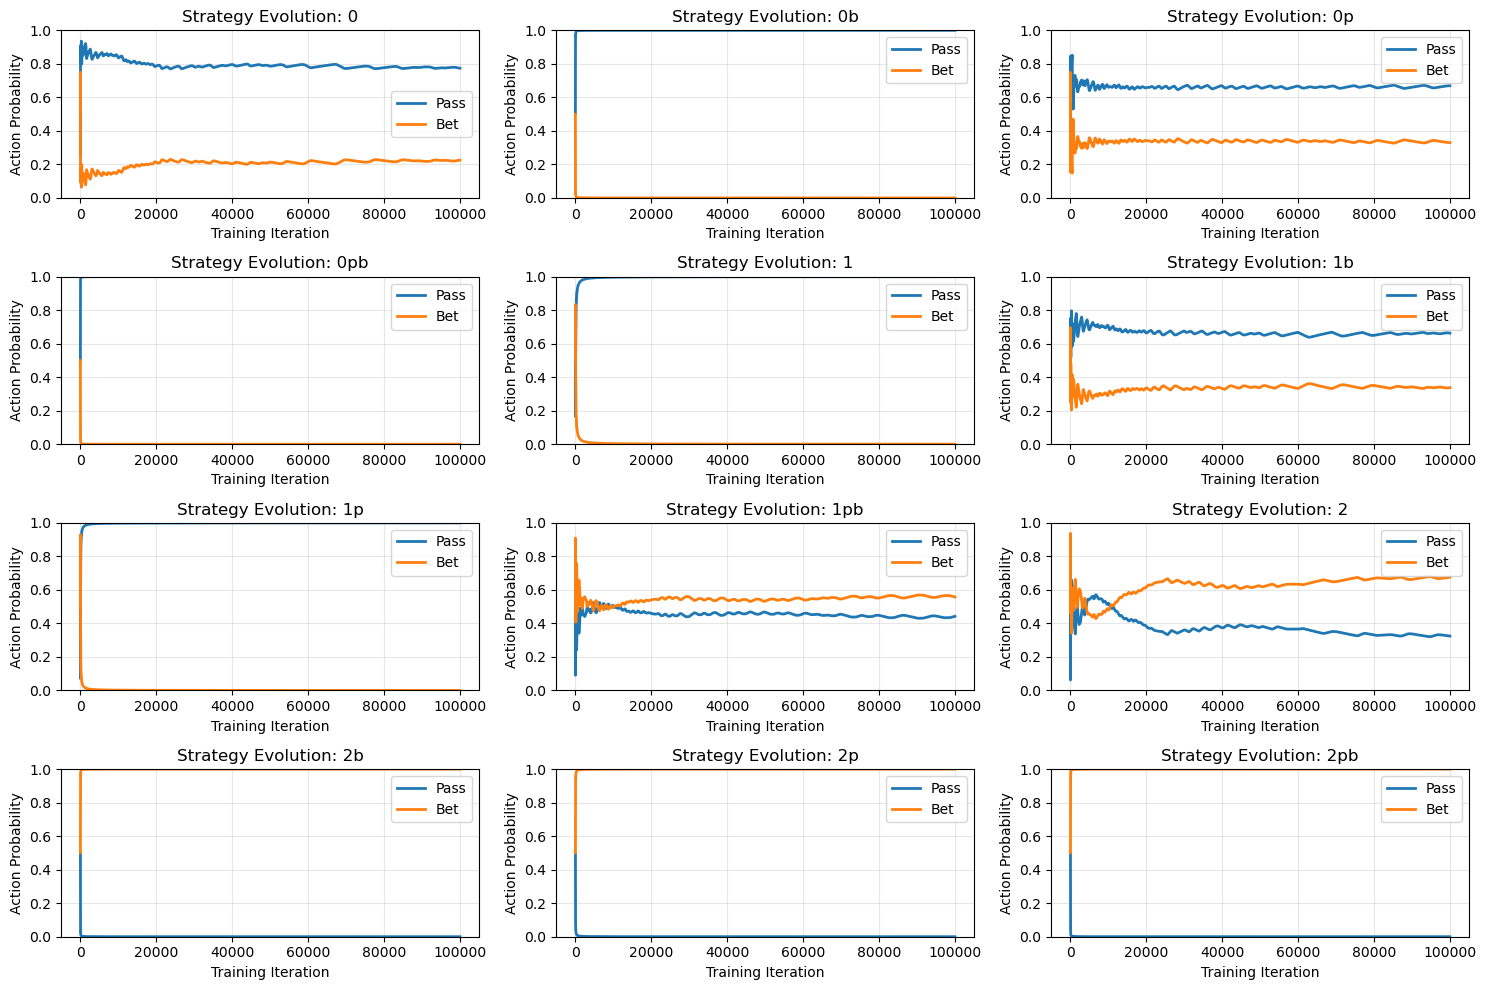

In [129]:
my_agents[g.agents[1]].plot_strategy_evolution(
    action_names={0: 'Pass', 1: 'Bet'},
    figsize=(15, 10)
)

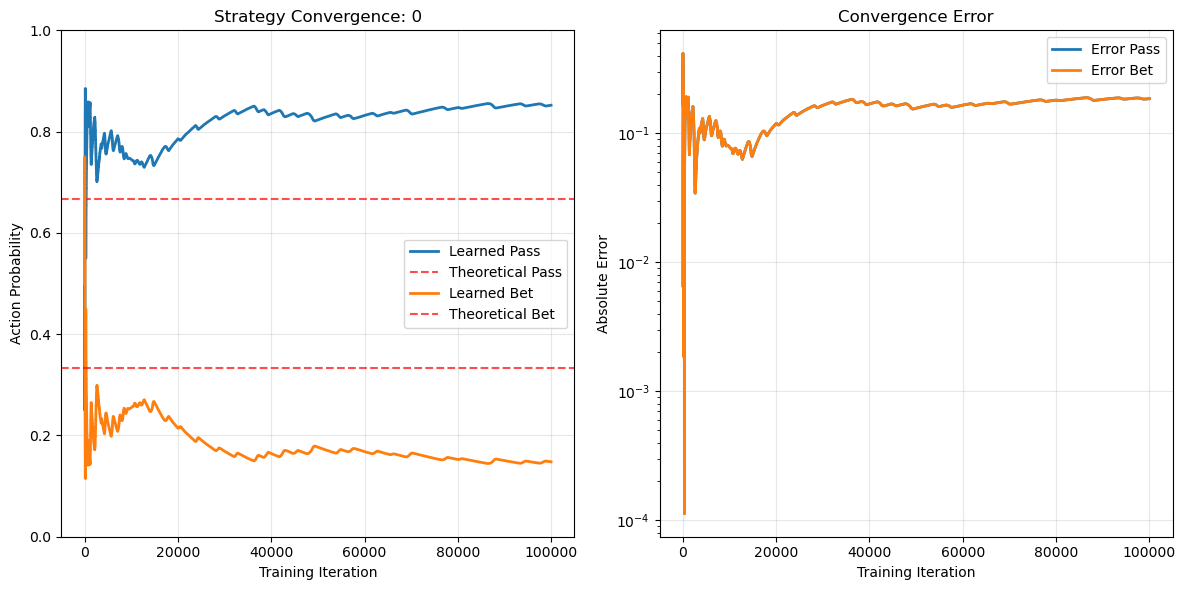

In [130]:
# Plot specific convergence analysis with theoretical values
# Example for Kuhn Poker theoretical values
theoretical_JX_bet = 1/3  # This should be calculated based on equilibrium

my_agents[g.agents[0]].plot_convergence_analysis(
    info_set_key='0',  # Jack with no history
    action_names={0: 'Pass', 1: 'Bet'},
    theoretical_values={0: 1 - theoretical_JX_bet, 1: theoretical_JX_bet},
    figsize=(12, 6)
)

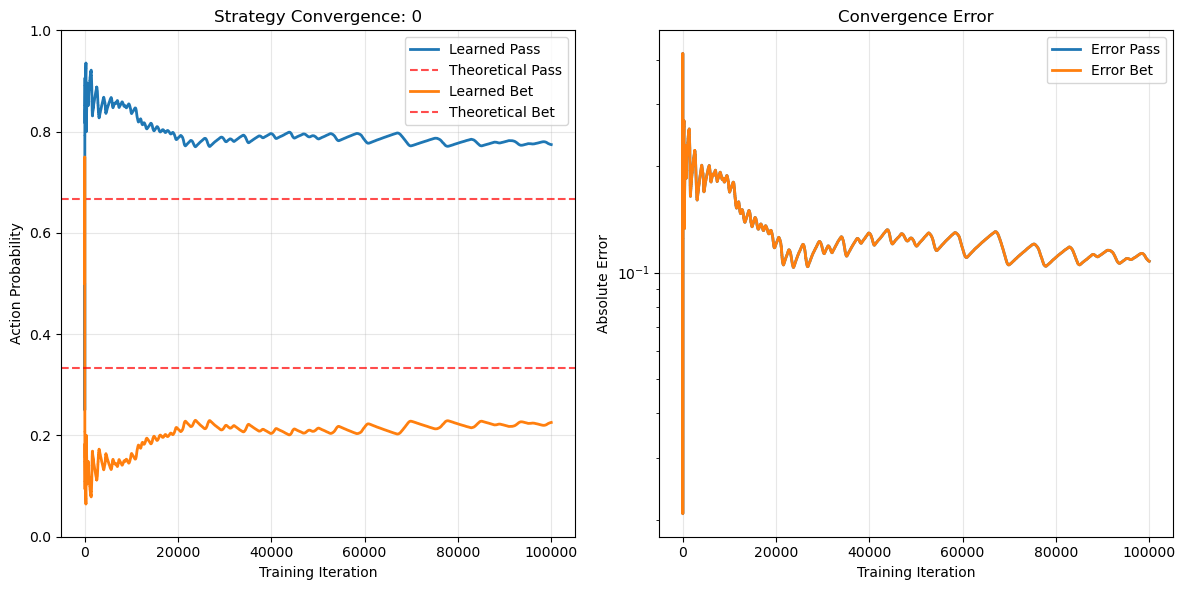

In [138]:
# Plot specific convergence analysis with theoretical values
# Example for Kuhn Poker theoretical values
theoretical_JX_bet = 1/3  # This should be calculated based on equilibrium

my_agents[g.agents[1]].plot_convergence_analysis(
    info_set_key='0',  # Jack with no history
    action_names={0: 'Pass', 1: 'Bet'},
    theoretical_values={0: 1 - theoretical_JX_bet, 1: theoretical_JX_bet},
    figsize=(12, 6)
)

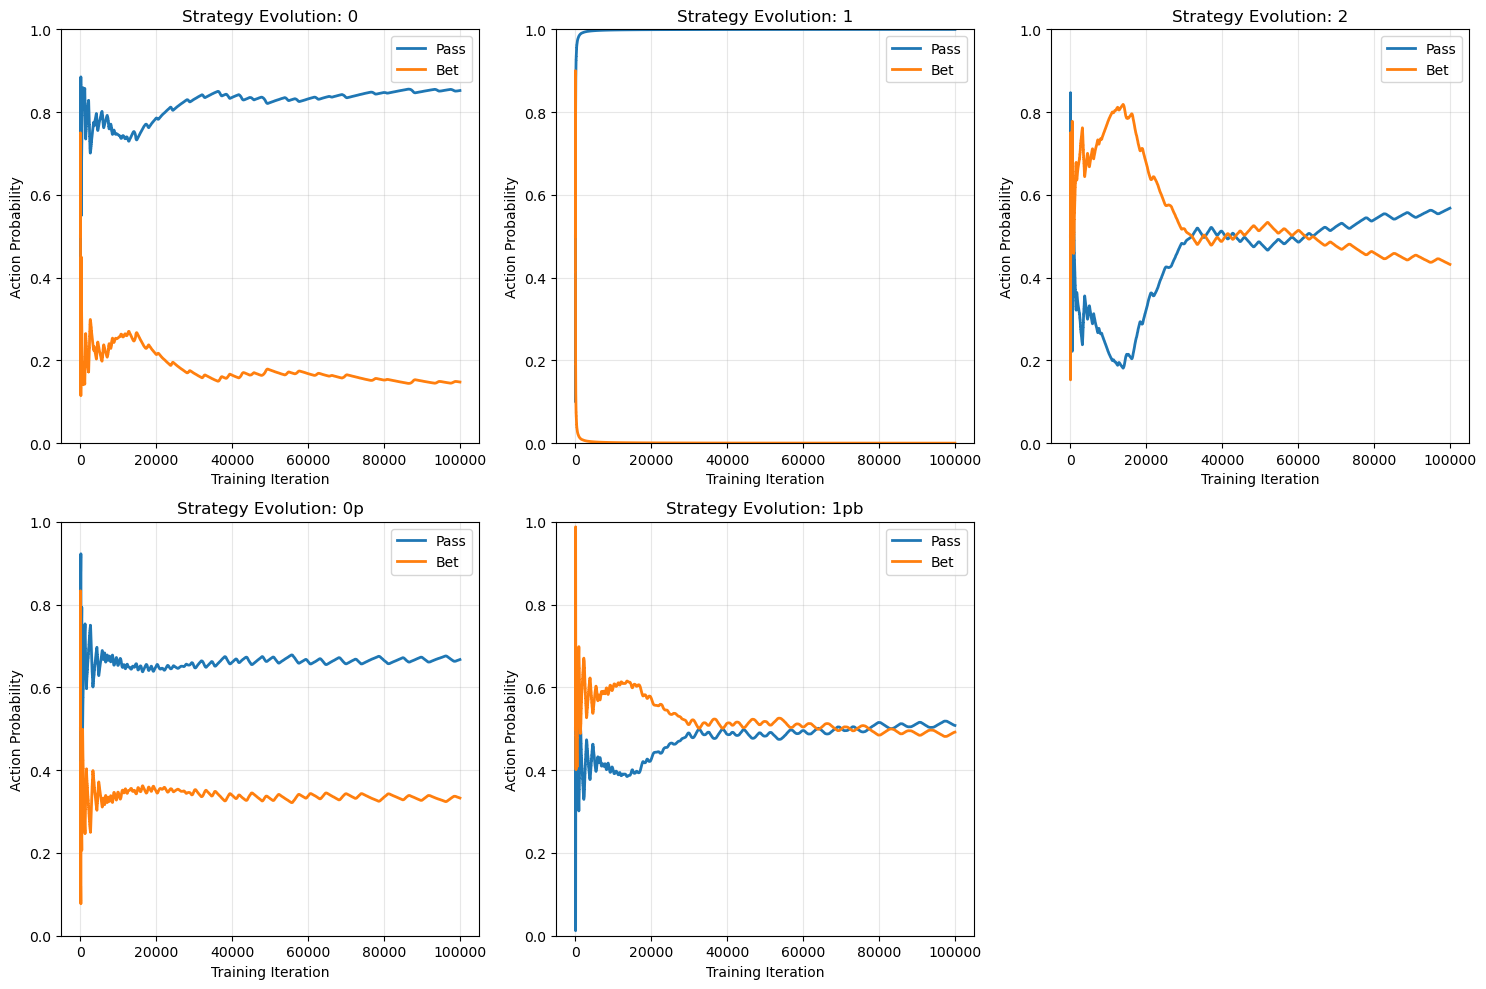

In [137]:
# Compare multiple information sets side by side
key_info_sets = ['0', '1', '2', '0p', '1pb']  # Key information sets for Kuhn Poker
my_agents[g.agents[0]].plot_strategy_evolution(
    info_set_keys=key_info_sets,
    action_names={0: 'Pass', 1: 'Bet'},
    figsize=(15, 10)
)

In [132]:
# Test action mapping
g.reset()
print("Initial state:", g.observe(g.agent_selection))
print("Available actions:", g.available_actions())

# Test action 0
g_test = g.clone()
print("Testing action 0...")
g_test.step(action=0)
print("State after action 0:", g_test.observe(g_test.agent_selection))

Initial state: 1
Available actions: [0, 1]
Testing action 0...
State after action 0: 0p
